In [11]:
################################################################################
"""Generate the silhouette of a mesh
as seen along a specified direction
"""
#import pip
#pip.main(['install', 'cv2'])
from vedo import *
import matplotlib.pyplot as pyplot
import cv2
import os
import shutil

In [12]:
def move_planes_file(file, destination_path):
    if os.path.exists(destination_path + file):
        os.remove(destination_path + file)
        shutil.move(file, destination_path)
    else:
        shutil.move(file, destination_path)


def obj_to_3ViewSketch(filepath, file):
    s = Mesh(filepath)
    destination_path = "planes/"
    sx = s.clone().project_on_plane('x').c('r').x(-3)
    sy = s.clone().project_on_plane('y').c('g').y(-3)
    sz = s.clone().project_on_plane('z').c('b').z(-3)

    x_projection = sx.silhouette('2d')
    y_projection = sy.silhouette('2d')
    z_projection = sz.silhouette('2d')

    plt = Plotter(offscreen=True)

    plt.look_at(plane='yz')
    plt.show(x_projection)
    x_plane_file = 'x_plane' + str(file) + '.png'
    plt.screenshot(filename=x_plane_file)
    move_planes_file('x_plane' + str(file) + '.png', destination_path)
    plt.clear()

    plt.look_at(plane='xz')
    plt.show(y_projection)
    y_plane_file = 'y_plane' + str(file) + '.png'
    plt.screenshot(filename=y_plane_file)
    move_planes_file('y_plane' + str(file) + '.png', destination_path)
    plt.clear()

    plt.look_at(plane='xy')
    plt.show(z_projection)
    z_plane_file = 'z_plane' + str(file) + '.png'
    plt.screenshot(filename=z_plane_file)
    move_planes_file('z_plane' + str(file) + '.png', destination_path)
    plt.clear()
    plt.close()

    # def plot_in_sketch(x_plane_file, y_plane_file, z_plane_file):
    fig = pyplot.figure(figsize=(10, 7))
    # setting values to rows and column variables
    rows = 2
    columns = 2
    # reading images
    img_x = cv2.imread('planes/' + x_plane_file)
    img_y = cv2.imread('planes/' + y_plane_file)
    img_z = cv2.imread('planes/' + z_plane_file)

    # Add x-Plane
    fig.add_subplot(rows, columns, 1)
    pyplot.imshow(img_x)
    pyplot.axis('off')
    # pyplot.title("X-Ebene")

    # Add y-Plane
    fig.add_subplot(rows, columns, 2)
    pyplot.imshow(img_y)
    pyplot.axis('off')
    # pyplot.title("Y-Ebene")

    # Add z-Plane
    fig.add_subplot(rows, columns, 3)
    pyplot.imshow(img_z)
    pyplot.axis('off')
    # pyplot.title("Z-Ebene")

    # save three images in one sketch
    pyplot.savefig('3view_sketches/sketch_' + str(file).rsplit(".")[0] + '.png', facecolor='white', edgecolor='none')

obj_files\00013655.obj


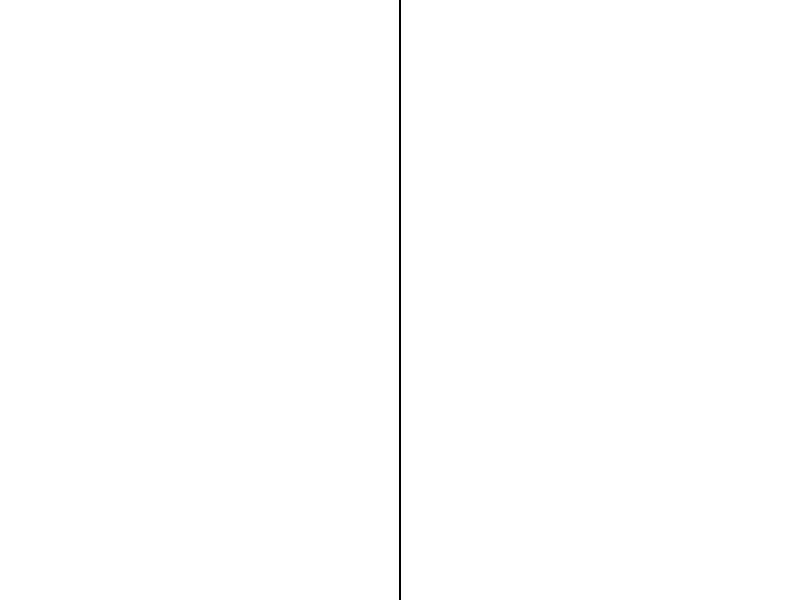

[vedo.io.py:1715] ERROR: in screenshot(), rendering window is not present, skip.


FileNotFoundError: [Errno 2] No such file or directory: 'x_plane00013655.obj.png'

In [14]:
directory = "obj_files"
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filepath = subdir + os.sep + file
        print(filepath)
        if filepath.endswith(".obj"):
            obj_to_3ViewSketch(filepath, file)
            print(filepath)
        else:
            continue